# Mini Project: Movie Data Analysis

#### This Notebook used Movie data for analysis and part of Mini Project

#### Data Source: MovieLens web site (filename: ml-20m.zip)
#### Location: https://grouplens.org/datasets/movielens/

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls ./datasets/movielens

README.txt
genome-scores.csv
genome-tags.csv
links.csv
ml-youtube.csv
movies.csv
ratings.csv
tags.csv


### import movie, tag and Rating csv files in panda data frame

In [3]:
movies = pd.read_csv('./datasets/movielens/movies.csv', sep=',')

In [4]:
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv('./datasets/movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings = pd.read_csv('./datasets/movielens/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


### Data analysis using Panda commands

In [7]:
ratings.mean()

userId       6.904587e+04
movieId      9.041567e+03
rating       3.525529e+00
timestamp    1.100918e+09
dtype: float64

In [8]:
ratings.std()

userId       4.003863e+04
movieId      1.978948e+04
rating       1.051989e+00
timestamp    1.621694e+08
dtype: float64

In [9]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


In [10]:
movies.shape

(27278, 3)

In [11]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [12]:
ratings.shape

(20000263, 4)

In [13]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [14]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [15]:
tags = tags.dropna()

In [16]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

### Total movies counts per rating categories

In [17]:
ratings_count = ratings[['movieId', 'rating']].groupby ('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


### Average Ratings per movie

In [18]:
average_count = ratings[['movieId', 'rating']].groupby (['movieId'], as_index=False).mean()
average_count

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592
5,6,3.834930
6,7,3.366484
7,8,3.142049
8,9,3.004924
9,10,3.430029


In [19]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [20]:
tags.pop('timestamp')

0         1240597180
1         1368150078
2         1368150079
3         1368149983
4         1368150078
5         1368149876
6         1368150160
7         1368149983
8         1368150055
9         1368150217
10        1368149925
11        1368149983
12        1368149925
13        1368151314
14        1368151266
15        1368150055
16        1368149983
17        1368149925
18        1368149926
19        1368149876
20        1368149949
21        1368150079
22        1368149983
23        1368149925
24        1368150012
25        1368151266
26        1305008715
27        1304957153
28        1304958354
29        1304958359
             ...    
465534    1298754654
465535    1298754636
465536    1298754658
465537    1298754620
465538    1357384633
465539    1358983914
465540    1358983914
465541    1358983914
465542    1358983914
465543    1358983946
465544    1358983693
465545    1358984062
465546    1358984051
465547    1358973995
465548    1358983979
465549    1358983979
465550    135

In [21]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [22]:
average_count.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [23]:
    movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
movies.shape

(27278, 3)

In [25]:
average_count.shape

(26744, 2)

In [26]:
average_count.duplicated(['movieId']).any()

False

In [27]:
average_count.describe()

,movieId,rating
count,26744.000000,26744.000000
mean,58789.612436,3.133200
std,44159.344871,0.664084
min,1.000000,0.500000
25%,6795.750000,2.800000
50%,65880.000000,3.235294
75%,99110.500000,3.565217
max,131262.000000,5.000000


In [28]:
movies.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [29]:
movies.duplicated('movieId').any()

False

In [30]:
average_count.movieId.isin(movies.movieId)

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
26714    True
26715    True
26716    True
26717    True
26718    True
26719    True
26720    True
26721    True
26722    True
26723    True
26724    True
26725    True
26726    True
26727    True
26728    True
26729    True
26730    True
26731    True
26732    True
26733    True
26734    True
26735    True
26736    True
26737    True
26738    True
26739    True
26740    True
26741    True
26742    True
26743    True
Name: movieId, Length: 26744, dtype: bool

### Movies which are not common in movies and tags csv files

In [31]:
movies.movieId.isin(average_count.movieId).any()

True

In [32]:
set(movies.movieId.values) - set(average_count.movieId.values)

{26018,
 26580,
 27249,
 27396,
 31797,
 32773,
 33019,
 33229,
 33573,
 45994,
 63280,
 65078,
 66622,
 69332,
 69565,
 69864,
 72681,
 72897,
 72908,
 77451,
 78713,
 79363,
 80226,
 80592,
 80787,
 80827,
 84291,
 85476,
 86314,
 86372,
 86949,
 87266,
 87466,
 88471,
 88833,
 89100,
 89135,
 89215,
 89341,
 89482,
 89806,
 90035,
 90116,
 90493,
 92268,
 92516,
 92845,
 92925,
 93002,
 94076,
 94435,
 94725,
 94808,
 96086,
 96176,
 96193,
 96275,
 96576,
 96598,
 98389,
 98398,
 98452,
 98583,
 98924,
 99020,
 99515,
 99562,
 99717,
 100463,
 100577,
 101216,
 101224,
 101237,
 101407,
 101472,
 101505,
 102156,
 102327,
 102417,
 102821,
 102823,
 103177,
 103472,
 103641,
 104095,
 104748,
 104750,
 105111,
 105279,
 105542,
 105792,
 105796,
 105961,
 105963,
 106028,
 106188,
 106245,
 106268,
 106423,
 106483,
 106521,
 106859,
 107226,
 107289,
 107640,
 108046,
 108125,
 108422,
 108816,
 108844,
 108846,
 109021,
 109231,
 109287,
 109319,
 109357,
 109392,
 109468,
 10964

In [33]:
genres = list({gen.split("|")[0] for gen in movies.genres})
genres.remove('(no genres listed)')
print(genres)

['Fantasy', 'Horror', 'War', 'Film-Noir', 'IMAX', 'Adventure', 'Thriller', 'Comedy', 'Romance', 'Documentary', 'Children', 'Crime', 'Sci-Fi', 'Animation', 'Mystery', 'Musical', 'Drama', 'Action', 'Western']


In [34]:
cols = movies.columns.values
cols = np.append(cols, list(genres))
movies_genr_expaned = pd.DataFrame(movies, columns=cols)
movies_genr_expaned = movies_genr_expaned.fillna(False)
for genr in genres:
    movies_genr_expaned[genr] = movies_genr_expaned['genres'].str.contains(genr)
#print(movies_genr_expaned)

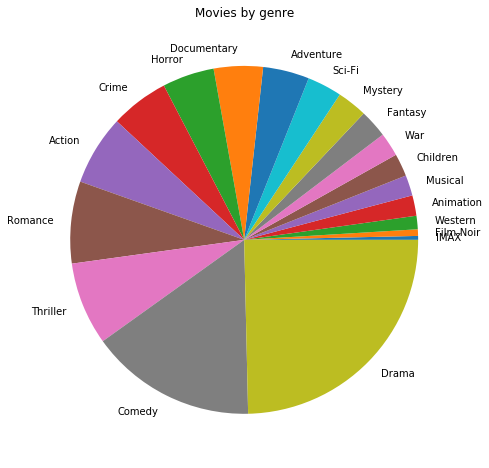

In [35]:
movies_genr_expaned[genres].sum().sort_values().plot(kind='pie', figsize=(8,8), title = "Movies by genre", label = "")

In [36]:
movies_genr_expaned[genres].sum().sort_values()/movies_genr_expaned[genres].sum().sum()*100

IMAX            0.361891
Film-Noir       0.609306
Western         1.248154
Animation       1.896233
Musical         1.912851
Children        2.103028
War             2.204579
Fantasy         2.607090
Mystery         2.795421
Sci-Fi          3.218242
Adventure       4.300222
Documentary     4.562408
Horror          4.820901
Crime           5.426514
Action          6.499261
Romance         7.620015
Thriller        7.714180
Comedy         15.461595
Drama          24.638109
dtype: float64

In [38]:
m_movies = pd.merge(ratings, movies_genr_expaned, how="inner")
m_movies[:3]

,userId,movieId,rating,timestamp,title,genres,Fantasy,Horror,War,Film-Noir,...,Documentary,Children,Crime,Sci-Fi,Animation,Mystery,Musical,Drama,Action,Western
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


(3.0, 4.0)

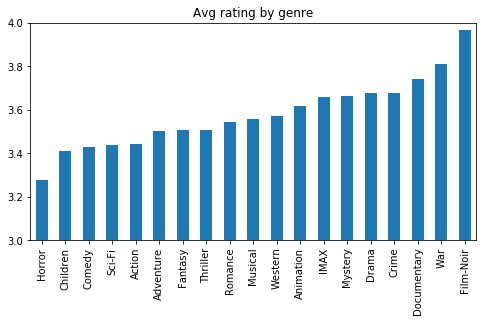

In [43]:
avg_ratings = {genr : m_movies[m_movies[genr]]['rating'].mean() for genr in genres}
avg_ratings = pd.Series(avg_ratings)
ax = avg_ratings.sort_values().plot(kind='bar', figsize=(8,4), title = "Avg rating by genre")
ax.set_ylim(3.0,4.0)

In [59]:
f_low_rating = m_movies['rating'] < 3
f_med_rating = (m_movies['rating'] >= 3) & (m_movies['rating'] < 4)
f_high_rating = m_movies['rating'] >= 4
ratings_range = {genr : {'Low_rating': m_movies[m_movies[genr] & f_low_rating]['rating'].count(),
                      'Mid_rating': m_movies[m_movies[genr] & f_med_rating]['rating'].count(),
                      'High_rating': m_movies[m_movies[genr] & f_high_rating]['rating'].count()}
               for genr in genres}
print(ratings_range)

{'Fantasy': {'Low_rating': 394139, 'Mid_rating': 689133, 'High_rating': 1028131}, 'Horror': {'Low_rating': 383102, 'Mid_rating': 490678, 'High_rating': 608957}, 'War': {'Low_rating': 116892, 'Mid_rating': 281018, 'High_rating': 650708}, 'Film-Noir': {'Low_rating': 15817, 'Mid_rating': 49917, 'High_rating': 150955}, 'IMAX': {'Low_rating': 70979, 'Mid_rating': 158355, 'High_rating': 263032}, 'Adventure': {'Low_rating': 797140, 'Mid_rating': 1462205, 'High_rating': 2121006}, 'Thriller': {'Low_rating': 930958, 'Mid_rating': 1798725, 'High_rating': 2583823}, 'Comedy': {'Low_rating': 1518119, 'Mid_rating': 2543264, 'High_rating': 3440851}, 'Romance': {'Low_rating': 634233, 'Mid_rating': 1254048, 'High_rating': 1913721}, 'Documentary': {'Low_rating': 28658, 'Mid_rating': 68867, 'High_rating': 147094}, 'Children': {'Low_rating': 341845, 'Mid_rating': 572917, 'High_rating': 754487}, 'Crime': {'Low_rating': 453172, 'Mid_rating': 1000828, 'High_rating': 1844335}, 'Sci-Fi': {'Low_rating': 650670, 

In [60]:
ratings_by_range = pd.DataFrame(ratings_range).transpose()
ratings_by_range = ratings_by_range.div(ratings_by_range.sum()) * 100
ratings_by_range.index.name = "Genre"
ratings_by_range.reset_index(inplace=True)
ratings_by_range

,Genre,High_rating,Low_rating,Mid_rating
0,Fantasy,3.858630,4.278002,3.979156
1,Horror,2.285448,4.158206,2.833248
2,War,2.442142,1.268751,1.622640
3,Film-Noir,0.566542,0.171678,0.288228
4,IMAX,0.987173,0.770409,0.914365
5,Adventure,7.960249,8.652193,8.442989
6,Thriller,9.697225,10.104659,10.386106
7,Comedy,12.913697,16.477730,14.685185
8,Romance,7.182297,6.883993,7.241060
9,Documentary,0.552052,0.311055,0.397648


(0.625, 20.125)

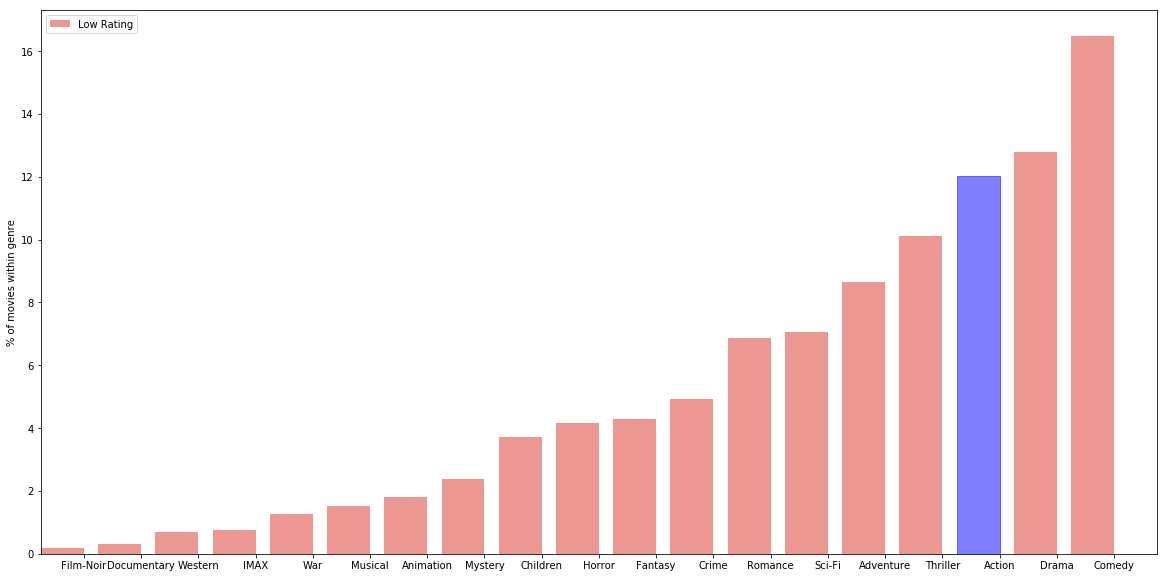

In [67]:
f1, ax1 = plt.subplots(1, figsize=(20,10))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(ratings_by_range['High_rating']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

ratings_by_range = ratings_by_range.sort_values(by=['Low_rating'])
b0 = ax1.bar(bar_l,
        ratings_by_range['Low_rating'],
        width=bar_width,
        label='Low Rating',
        alpha=0.5,
        color='#dd3127')
plt.xticks(tick_pos, ratings_by_range['Genre'])
ax1.set_ylabel('% of movies within genre')
plt.legend(loc='upper left')
b0[16].set_color('b')

# set the x ticks with names
plt.xticks(tick_pos, ratings_by_range['Genre'])
b2[4].set_color('b')
ax3.set_ylabel('% of movies within genre')
ax3.set_ylim(30,70)

# Set the label and legends
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

(0.625, 20.125)

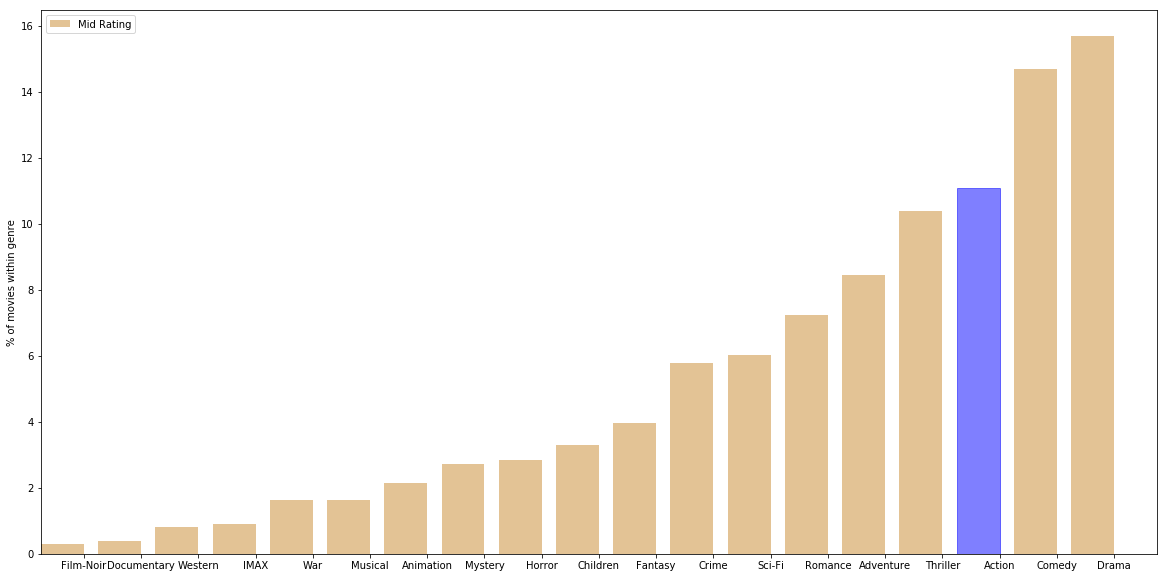

In [73]:
f1, ax1 = plt.subplots(1, figsize=(20,10))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(ratings_by_range['High_rating']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

ratings_by_range = ratings_by_range.sort_values(by=['Mid_rating'])
b0 = ax1.bar(bar_l,
        ratings_by_range['Mid_rating'],
        width=bar_width,
        label='Mid Rating',
        alpha=0.5,
        color='#c9882d')
plt.xticks(tick_pos, ratings_by_range['Genre'])
ax1.set_ylabel('% of movies within genre')
plt.legend(loc='upper left')
b0[16].set_color('b')

# set the x ticks with names
plt.xticks(tick_pos, ratings_by_range['Genre'])
b2[4].set_color('b')
ax3.set_ylabel('% of movies within genre')
ax3.set_ylim(30,70)

# Set the label and legends
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

(0.625, 20.125)

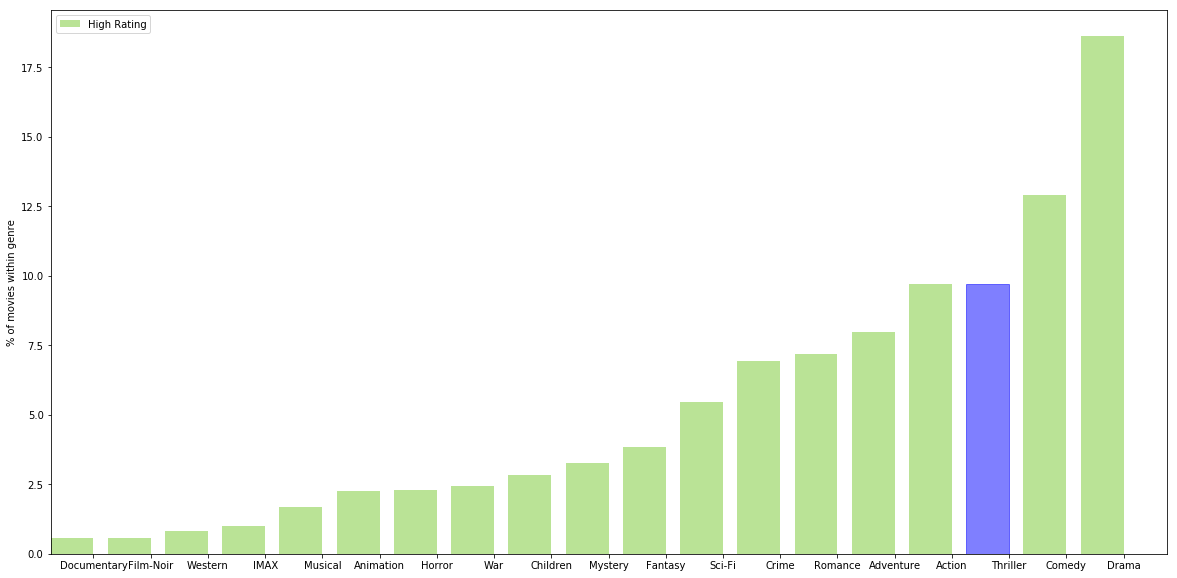

In [72]:
f1, ax1 = plt.subplots(1, figsize=(20,10))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(ratings_by_range['High_rating']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

ratings_by_range = ratings_by_range.sort_values(by=['High_rating'])
b0 = ax1.bar(bar_l,
        ratings_by_range['High_rating'],
        width=bar_width,
        label='High Rating',
        alpha=0.5,
        color='#76c92e')
plt.xticks(tick_pos, ratings_by_range['Genre'])
ax1.set_ylabel('% of movies within genre')
plt.legend(loc='upper left')
b0[16].set_color('b')

# set the x ticks with names
plt.xticks(tick_pos, ratings_by_range['Genre'])
b2[4].set_color('b')
ax3.set_ylabel('% of movies within genre')
ax3.set_ylim(30,70)

# Set the label and legends
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])